# Data Wrangling - Chicago Business Licenses 2019

## Set up the environment

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import math
from scipy import stats
import geopandas
from collections import Counter
from shapely.geometry import Point

In [2]:
import os
os.getcwd()

'C:\\Users\\aroge\\Documents\\GitHub\\Springboard\\Chicago_Crime'

## Import the Business Licenses file

The dataset is from the Chicago Data Portal, Business Licenses. Since we are interested in businesses that were active in 2019, the dataset contains all licenses with "license term expiration date" in 2019 and later, and "license term start date" in 2019 and earlier.

In [3]:
bl = pd.read_csv('business_licenses_2019.csv') 

C:\Users\aroge\anaconda3\envs\TestEnv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Inspect the data

In [4]:
bl.dtypes

ID                                    object
LICENSE ID                             int64
ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
BUSINESS ACTIVITY ID                  object
BUSINESS ACTIVITY                     object
LICENSE NUMBER                         int64
APPLICATION TYPE                      object
APPLICATION CREATED DATE              object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DA

In [5]:
bl['APPLICATION CREATED DATE'] = pd.to_datetime(bl['APPLICATION CREATED DATE'])  
bl['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(bl['APPLICATION REQUIREMENTS COMPLETE'])  
bl['PAYMENT DATE'] = pd.to_datetime(bl['PAYMENT DATE'])  
bl['LICENSE TERM START DATE'] = pd.to_datetime(bl['LICENSE TERM START DATE'])  
bl['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(bl['LICENSE TERM EXPIRATION DATE'])  
bl['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(bl['LICENSE APPROVED FOR ISSUANCE'])  
bl['DATE ISSUED'] = pd.to_datetime(bl['DATE ISSUED'])  
bl['LICENSE STATUS CHANGE DATE'] = pd.to_datetime(bl['LICENSE STATUS CHANGE DATE'])  
#bl['LICENSE STATUS CHANGE DATE'] = bl['LICENSE STATUS CHANGE DATE'].dt.normalize()
bl.dtypes

ID                                           object
LICENSE ID                                    int64
ACCOUNT NUMBER                                int64
SITE NUMBER                                   int64
LEGAL NAME                                   object
DOING BUSINESS AS NAME                       object
ADDRESS                                      object
CITY                                         object
STATE                                        object
ZIP CODE                                     object
WARD                                        float64
PRECINCT                                    float64
WARD PRECINCT                                object
POLICE DISTRICT                             float64
LICENSE CODE                                  int64
LICENSE DESCRIPTION                          object
BUSINESS ACTIVITY ID                         object
BUSINESS ACTIVITY                            object
LICENSE NUMBER                                int64
APPLICATION 

In [6]:
bl.shape

(99029, 34)

In [7]:
bl.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,2609257-20180711,2609257,428254,2,"ART OF DOSA, LLC",ART OF DOSA,820 N ORLEANS ST,CHICAGO,IL,60610,...,2018-07-11,2019-01-02,2018-07-11,2018-07-11,AAI,NaT,NaN,41.897338,-87.637345,"(41.897338047455214, -87.63734543001038)"
1,2608406-20180621,2608406,356957,4,"HAROLD'S ON WABASH, INC.",HAROLD'S CHICKEN,2300 S THROOP ST,CHICAGO,IL,60608,...,2018-06-21,2019-01-04,2018-06-21,2018-06-21,AAI,NaT,NaN,41.850451,-87.658798,"(41.85045102427, -87.65879785567869)"
2,2636934-20181205,2636934,44897,7,ERIC WILLIAMS,THE SILVER ROOM,1302 N MILWAUKEE AVE,CHICAGO,IL,60622,...,2018-12-05,2019-01-05,2018-12-05,2018-12-05,AAI,NaT,33.0,41.905243,-87.669647,"(41.905243179899976, -87.66964736332534)"
3,2641788-20190102,2641788,396358,3,WINDY CITY PLAYHOUSE,WINDY CITY PLAYHOUSE,2229 S MICHIGAN AVE 101,CHICAGO,IL,60616,...,2019-01-02,2019-01-06,2019-01-02,2019-01-02,AAI,NaT,NaN,41.852019,-87.623635,"(41.85201901299171, -87.62363504682149)"
4,2608534-20180705,2608534,310581,11,"GARIFUNA ENTERPRISES, INC.",GARIFUNA FLAVA CARIBBEAN RESTAURANT,2518 W 63RD ST,CHICAGO,IL,60629,...,2018-07-05,2019-01-07,2018-07-05,2018-07-05,AAI,NaT,3.0,41.779320,-87.686974,"(41.779320429504864, -87.6869743899248)"


In [8]:
bl['CITY'].value_counts()

CHICAGO            90324
NORTHBROOK           139
SKOKIE               127
DES PLAINES          122
NAPERVILLE           121
                   ...  
WOODBURY               1
PORT JEFFERSON         1
INDIANOPOLIS           1
MENOMONEE FALLS        1
LITCHFIELD             1
Name: CITY, Length: 1174, dtype: int64

In [9]:
bl.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                  55
ADDRESS                                  0
CITY                                     2
STATE                                    0
ZIP CODE                               113
WARD                                  8746
PRECINCT                             19590
WARD PRECINCT                         8730
POLICE DISTRICT                      19012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
BUSINESS ACTIVITY ID                 11416
BUSINESS ACTIVITY                    11416
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             75816
APPLICATION REQUIREMENTS COMPLETE      342
PAYMENT DATE                           650
CONDITIONAL

In [10]:
print("The Business Licenses file has", bl.shape[0], "rows, of which",
      bl[bl.LATITUDE.isnull()].shape[0], "rows have NULL location data.")

The Business Licenses file has 99029 rows, of which 10291 rows have NULL location data.


## Exploration of rows with NULL location data

In [11]:
bl_nulls = bl[bl.LATITUDE.isnull()]
print(bl_nulls['CITY'].value_counts())

CHICAGO            1967
NORTHBROOK          138
SKOKIE              126
NAPERVILLE          120
DES PLAINES         102
                   ... 
KING OF PRUSSIA       1
HOLMDEL               1
MILLINGTON            1
HUNTINGTON            1
ELKHART               1
Name: CITY, Length: 1142, dtype: int64


We see that while "Chicago" is the most common city, around 80% of the other rows are for businesses with addresses outside Chicago. (They are licensed to conduct business in Chicago.)

In [12]:
print(bl_nulls[bl_nulls['CITY'] == 'CHICAGO']['ADDRESS'].value_counts())

[REDACTED FOR PRIVACY]                         1009
950 W ADDISON ST LL, 1 & 4                       10
101 E ERIE ST 1, 8-21                             9
151 E WACKER DR  PLAZA                            9
10 S CLINTON ST 1,2,3                             9
                                               ... 
10 S RIVERSIDE PLZ 9TH FLOOR 900,1000             1
10000 W O'HARE ST UP, WEST T38HA TERMINAL #       1
1146 S DELANO CT MAIN B152                        1
4505 S DREXEL BLVD BASEMENT,1ST,2ND,3RD           1
2214-2228 W WALNUT ST 1ST, 2ND 3RD                1
Name: ADDRESS, Length: 493, dtype: int64


Of the businesses located in Chicago with NULL location data, over half have had their street address redacted by the Chicago Data Portal. 

### Redacted Addresses

In [13]:
# For those with Redacted Addresses, find the types of businesses

bl_redacted_addresses = bl_nulls.query(
    'CITY == "CHICAGO" and ADDRESS == "[REDACTED FOR PRIVACY]"')

print("License Descriptions")
print(bl_redacted_addresses['LICENSE DESCRIPTION'].value_counts())

License Descriptions
Pharmaceutical Representative    632
Regulated Business License       377
Name: LICENSE DESCRIPTION, dtype: int64


In [14]:
print("Business Activities")
print(bl_redacted_addresses['BUSINESS ACTIVITY'].value_counts())


Business Activities
Markets / Promotes Pharmaceuticals to Health Care Professionals and Conducts Business for More than 15 Calendar Days per Year                                                         632
Vacation Rental - Approved Prior to House Share Ordinance                                                                                                                             168
Vacation Rental Building Containing Five or More Dwelling Units For Transient Occupancy                                                                                               124
Bed and Breakfast Establishment, Owner-Occupied, 11 or Fewer Sleeping Rooms Available for Rent for Transient Occupancy by Registered Guests                                            35
Vacation Rental Building Containing Two to Four Dwelling Units For Transient Occupancy                                                                                                 33
Vacation Rental - Commissioner's Adjustment | Vaca

The businesses with redacted address information are pharmaceutical reps and various kinds of vacation rentals (including bed and breakfast establishments).

### Other businesses in Chicago without redacted address data

In [15]:
bl_missing_loc = bl_nulls.query(
    'CITY == "CHICAGO" and ADDRESS != "[REDACTED FOR PRIVACY]"')

print("There are", bl_missing_loc.shape[0],
      "rows of data for businesses in Chicago with no location data and without redacted address data.")

There are 958 rows of data for businesses in Chicago with no location data and without redacted address data.


This represents about 1% of all business licenses in the dataset.

## Removing irrelevant data

### Null location data

As shown in the previous section, location data is missing when businesses located outside Chicago and when the dataset owner redacted the data for privacy of the license holders. 

About 1% of the data shows businesses with address data in Chicago but no latitude and longitude. It may be worthwhile in the future to lookup the latitude and longitude data for the businesses rows. For now, since this is a small fraction of all data, rows with NULL location data will be dropped from the dataset.

In [16]:
# Print the number of rows in the original dataframe
print("Number of rows in original dataframe =", bl.shape[0])

# Create a new dataframe without the rows with NULL location data
null_locations = bl[bl.LATITUDE.isnull()].index
bl_trimmed = bl.drop(null_locations)

# Print the number of rows in the new dataframe
print("Number of rows in cleaned dataframe =", bl_trimmed.shape[0])

Number of rows in original dataframe = 99029
Number of rows in cleaned dataframe = 88738


### Canceled and revoked licenses

Delete the rows for licenses canceled or revoked before 2019. 

In [17]:
# Find all rows for licenses canceled or revoked before 2019
canceled = ((bl_trimmed['LICENSE STATUS'] == "AAC") |
            (bl_trimmed['LICENSE STATUS'] == "REV")) & (
                bl_trimmed['LICENSE STATUS CHANGE DATE'] < '2019-01-01')

# Print the counts of total rows and rows to be dropped
print('Rows before dropping:', bl_trimmed.shape[0])
print('Licenses canceled or revoked before 2019:',
      bl_trimmed[canceled].shape[0])

# Using the inverted boolean, select just the rows that don't meet the condition

bl_trimmed = bl_trimmed[~canceled]
print('Rows after dropping:', bl_trimmed.shape[0])

Rows before dropping: 88738
Licenses canceled or revoked before 2019: 1805
Rows after dropping: 86933


### "INQ" licenses

Delete the rows for licenses status = Inquiry. 

In [18]:
# Find all license inquiries
inquiries = bl_trimmed['LICENSE STATUS'] == "INQ"

# Print the counts of total rows and rows to be dropped
print('Rows before dropping:', bl_trimmed.shape[0])
print('License inquiries:',
      bl_trimmed[inquiries].shape[0])

# Using the inverted boolean, keep just the rows that don't meet the condition

bl_trimmed = bl_trimmed[~inquiries]
print('Rows after dropping:', bl_trimmed.shape[0])

Rows before dropping: 86933
License inquiries: 2
Rows after dropping: 86931


### Canceled before term started

In [19]:
# Find all rows for licenses canceled or revoked before 2019
canceled = (bl_trimmed['LICENSE STATUS CHANGE DATE'] <= bl_trimmed['LICENSE TERM START DATE'])

# Print the counts of total rows and rows to be dropped
print('Rows before dropping:', bl_trimmed.shape[0])
print('Licenses canceled or revoked before 2019:',
      bl_trimmed[canceled].shape[0])

# Using the inverted boolean, select just the rows that don't meet the condition

bl_trimmed = bl_trimmed[~canceled]
print('Rows after dropping:', bl_trimmed.shape[0])

Rows before dropping: 86931
Licenses canceled or revoked before 2019: 24
Rows after dropping: 86907


### Expired before term started

In [20]:
# Find all rows for licenses canceled or revoked before 2019
canceled = (bl_trimmed['LICENSE TERM EXPIRATION DATE'] < bl_trimmed['LICENSE TERM START DATE'])

# Print the counts of total rows and rows to be dropped
print('Rows before dropping:', bl_trimmed.shape[0])
print('Licenses canceled or revoked before 2019:',
      bl_trimmed[canceled].shape[0])

# Using the inverted boolean, select just the rows that don't meet the condition

bl_trimmed = bl_trimmed[~canceled]
print('Rows after dropping:', bl_trimmed.shape[0])

Rows before dropping: 86907
Licenses canceled or revoked before 2019: 29
Rows after dropping: 86878


## Duplicate rows

When a license expired and was renewed in 2019, there will be 2 rows in the data. Remove instances where multiple rows share same Location and License Code. This assumes that there is only one business of a given type at a location.

In [21]:
bl_trimmed = bl_trimmed.drop_duplicates(subset=['LICENSE CODE', 'LOCATION'])
print('Rows after dropping:', bl_trimmed.shape[0])

Rows after dropping: 50401


## License codes and descriptions

### Create a dictionary of License Codes

In [22]:
# Create a new dataframe of just 2 columns. 
bl_lic_cd = bl_trimmed.filter(['LICENSE CODE', 'LICENSE DESCRIPTION'])

#To speed processing, Drop duplicates.
bl_lic_cd = bl_lic_cd.drop_duplicates(subset=['LICENSE CODE', 'LICENSE DESCRIPTION'])

# Drop null values
bl_lic_cd = bl_lic_cd.dropna()

print(bl_lic_cd.sort_values(by=['LICENSE DESCRIPTION'])['LICENSE DESCRIPTION'])

34928                                          Affiliation
489                                    Animal Care License
25114                            Bicycle Messenger Service
199                               Caterer's Liquor License
12                    Children's Services Facility License
1629                                     Commercial Garage
45962                          Commercial Passenger Vessel
185          Consumption on Premises - Incidental Activity
34971                                    Emerging Business
10765                                           Explosives
210                                        Filling Station
12217                                Food - Shared Kitchen
1970                  Food - Shared Kitchen - Supplemental
2669                                             Heliports
3                                     Indoor Special Event
1335                                             Late Hour
31572                                      License Manag

## Business Activity columns

### Create a dictionary of Business Activities

In [23]:
# Create a new dataframe of just 2 columns. 
bl_bus_acts = bl_trimmed.filter(['BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY'])

#To speed processing, Drop duplicates.
bl_bus_acts = bl_bus_acts.drop_duplicates(subset=['BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY'])

# Drop null values
bl_bus_acts = bl_bus_acts.dropna()

print(bl_bus_acts)

      BUSINESS ACTIVITY ID                                  BUSINESS ACTIVITY
0                      946              180 Day Multiple - Special Event Food
1                      947  180 Day Multiple - Special Event Food, Mobile ...
2                      783        Sale of General Merchandise, Seasonal Items
3                      892                               Indoor Special Event
7                      922        Retail Sales of Cell Phones and Accessories
...                    ...                                                ...
97732      708 | 911 | 668  Miscellaneous Commercial Services | Retail Sal...
97827            705 | 713  Provide Oil Change and Tire Repair Services | ...
98243      904 | 829 | 767  Retail Sales of General Merchandise | Tavern -...
98864            660 | 722  Financial Services (Home Based Business) | Onl...
98933      648 | 911 | 631  Dry Cleaning - Drop Off Location | Retail Sale...

[2482 rows x 2 columns]


In [24]:
bl_bus_acts.astype(str)
bl_bus_acts.dtypes
print(bl_bus_acts.iloc[20:25])

   BUSINESS ACTIVITY ID                                  BUSINESS ACTIVITY
45            667 | 863  Graphic Design (Home Based Business) | Event P...
51                  911     Retail Sales of Clothing / Accessories / Shoes
52            904 | 640  Retail Sales of General Merchandise | Deli, Bu...
53                  730  Photographer, Portrait Artist, Videographer (H...
54                  674         Home Repair Services (Home Based Business)


In [25]:
# Populate a dictionary with the Business Activities

ba_dict = {}

for i in bl_bus_acts.index:

    # Parse the fields, which are delimited by " | "
    ba_list = bl_bus_acts['BUSINESS ACTIVITY'][i].split(' | ')
    ba_id_list = bl_bus_acts['BUSINESS ACTIVITY ID'][i].split(' | ')
    for single_ba_id in ba_id_list:
        ba_dict[single_ba_id] = ba_list[ba_id_list.index(single_ba_id)]

In [26]:
# Print the Business Activity dictionary
print("There are", len(ba_dict), "distinct business activity values:")
for key in sorted(ba_dict):
    print(key, ba_dict[key])

There are 343 distinct business activity values:
1000 Provide Chair Massage - Fully Clothed/No Disrobing
1001 Taxi Affiliation and Two Way Radio Dispatch
1011 Operation of a Commercial Passenger Vessel - Under 20 Passengers
1012 Operation of a Commercial Passenger Vessel - 20 or More Passengers
1018 1 Year Pop-Up Food Est. User - Tier I (Sale of Pre-Packaged, Non-Perishable Food)
1021 90 Day Pop-Up Food Est. User - Tier II (Sale of Pre-Packaged, Prepared Hot/Cold Food, Final Prep On-Site)
1024 90 Day Pop-Up Food Est. User - Tier III (Prepare and Serve Hot/Cold Food On-Site)
1025 Pop-Up Food Est. User Host - Tier II (Pre-Packaged Prepared Hot/Cold Food. Final Prep On-Site)
1027 Organizer of a 1-5 Day Event w/ Pop-Up Retail Users at a Trade Show, Exhibition or Convention
1028 Organizer of a 6-30 Day Event w/ Pop- Up Retail Users at a Trade Show, Exhibition or Convention
1029 Organizer of a 31-90 Day Event w/ Pop-Up Retail Users at a Trade Show, Exhibition or Convention
1030 Organizer of 

Are any of these categories of Business Activities interesting for this project? Are there activities which might correspond to increased / decreased crime?

Possible items of interest (to be narrowed down):

638 Consumption of Liquor on Premises

639 Consumption of Liquor on Premises, Not for Profit

640 Deli, Butcher or Bakery

664 Fortune Telling, Astrology, Tarot Card Reading Only

666 Operation of a Fuel Filling Station

676 Hotel - 7 or More Sleeping Rooms

688 Jewelry, Watches and Accessories

689 Junk Peddler

692 Laundromat - Self Service

704 Massage Establishment

725 Provide Parking Spaces For a Fee - Available and Advertised to the Public

726 Provide Parking Spaces For a Fee - to Residents, Tenants, Users, Employees and/or Guests (Not Available or Advertised to the Public)

728 Operate a Pet Shop / Sales of Animals

732 Pledging of Property for Money (Pawn)

735 Preparation of Food and Dining on Premise With Seating

745 Provide Full Body Massage Services

763 Retail Sale of Tobacco

774 Retail Sales of Packaged Liquor

776 Retail Sales of Tobacco Products

781 Sale of Food Prepared Onsite With Dining Area

784 Sale of Liquor Outdoors on Private Property

785 Sale of Liquor Until 4am, Monday - Saturday and 5am on Sunday

810 Smoking of Tobacco on Premises

811 Smoking of Tobacco With a Mouthpiece Attached to a Container of Water Through Which Smoke is Drawn and Cooled

828 Tattoo / Permanent Body Art and Make-Up / Micro Blading

829 Tavern - Consumption of Liquor on Premise

903 Self Storage Facility

932 Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM

936 Retail Sales of Tobacco Accessories

937 Retail Sales of Tobacco and Flavored Tobacco Products

961 Retail Sales of Live Poultry

967 Sampling of Vaping Products on Premises

993 Consumption of Liquor on Premises - Riverwalk Venue

994 Consumption of Liquor on Premises - Lakefront Venue


# Data Wrangling - Chicago Crime

## Import the file and inspect its basic characteristics

In [27]:
df = pd.read_csv('crimes_2019.csv', index_col='ID') 

In [28]:
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
11734802,JC301648,6/11/2019 6:00,033XX W FILLMORE ST,1812,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,POLICE FACILITY / VEHICLE PARKING LOT,False,False,1134,...,24.0,29,18,NaN,NaN,2019,6/18/2020 15:48,NaN,NaN,NaN
12080437,JD265831,11/1/2019 5:00,063XX S CALIFORNIA AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,825,...,17.0,66,08B,NaN,NaN,2019,6/18/2020 15:48,NaN,NaN,NaN
11721309,JC288956,6/2/2019 12:22,044XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,VEHICLE NON-COMMERCIAL,False,False,1113,...,28.0,26,18,NaN,NaN,2019,6/18/2020 15:48,NaN,NaN,NaN
12078686,JD264973,6/15/2019 0:01,014XX W GEORGE ST,530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,ALLEY,False,False,1932,...,32.0,6,04A,1166295.0,1919354.0,2019,6/18/2020 15:46,41.934286,-87.664279,"(41.93428599, -87.66427875)"
11725655,JC286220,5/31/2019 12:05,079XX S DR MARTIN LUTHER KING JR DR,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),SIDEWALK,False,False,623,...,6.0,44,18,NaN,NaN,2019,6/18/2020 15:48,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259210 entries, 11734802 to 24554
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           259210 non-null  object 
 1   Date                  259210 non-null  object 
 2   Block                 259210 non-null  object 
 3   IUCR                  259210 non-null  object 
 4   Primary Type          259210 non-null  object 
 5   Description           259210 non-null  object 
 6   Location Description  258144 non-null  object 
 7   Arrest                259210 non-null  bool   
 8   Domestic              259210 non-null  bool   
 9   Beat                  259210 non-null  int64  
 10  District              259210 non-null  int64  
 11  Ward                  259195 non-null  float64
 12  Community Area        259210 non-null  int64  
 13  FBI Code              259210 non-null  object 
 14  X Coordinate          258033 non-null  float64

## Check the columns for null values

In [30]:
df.isnull().sum()

Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1066
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      15
Community Area             0
FBI Code                   0
X Coordinate            1177
Y Coordinate            1177
Year                       0
Updated On                 0
Latitude                1177
Longitude               1177
Location                1177
dtype: int64

Nulls for the location-based columns is our biggest problem since the purpose of this project is to study crime based on other factors at the same location. This will be addressed below.

## Explore the contents of the data, column by column

In [31]:
df['Block'].value_counts()

001XX N STATE ST          1087
008XX N MICHIGAN AVE       472
0000X W TERMINAL ST        427
0000X S STATE ST           411
0000X N STATE ST           363
                          ... 
019XX W Foster Ave           1
045XX S KOLIN AVE            1
021XX W 36TH ST              1
100XX S CRANDON AVE          1
034XX N PITTSBURGH AVE       1
Name: Block, Length: 27777, dtype: int64

In [32]:
df['IUCR'].value_counts().sort_index()

031A    2640
031B      45
033A     239
033B       6
041A    1606
        ... 
928        1
930      593
935       26
937        1
938        1
Name: IUCR, Length: 318, dtype: int64

In [33]:
df['IUCR'].value_counts()

486     23586
820     23131
460     16442
810     14646
560     13880
        ...  
928         1
1682        1
141         1
2040        1
937         1
Name: IUCR, Length: 318, dtype: int64

In [34]:
df['Primary Type'].value_counts()

THEFT                                62387
BATTERY                              49487
CRIMINAL DAMAGE                      26671
ASSAULT                              20608
DECEPTIVE PRACTICE                   18330
OTHER OFFENSE                        16696
NARCOTICS                            14238
BURGLARY                              9627
MOTOR VEHICLE THEFT                   8978
ROBBERY                               7989
CRIMINAL TRESPASS                     6817
WEAPONS VIOLATION                     6325
OFFENSE INVOLVING CHILDREN            2293
INTERFERENCE WITH PUBLIC OFFICER      1546
PUBLIC PEACE VIOLATION                1520
SEX OFFENSE                           1297
CRIM SEXUAL ASSAULT                   1244
PROSTITUTION                           680
HOMICIDE                               503
ARSON                                  378
CRIMINAL SEXUAL ASSAULT                356
LIQUOR LAW VIOLATION                   231
STALKING                               223
CONCEALED C

In [35]:
df['Location Description'].value_counts()

STREET                56450
RESIDENCE             42878
APARTMENT             34638
SIDEWALK              20181
OTHER                 10563
                      ...  
BOAT / WATERCRAFT         1
CTA SUBWAY STATION        1
BASEMENT                  1
CHA PLAY LOT              1
TRAILER                   1
Name: Location Description, Length: 155, dtype: int64

In [36]:
df['Arrest'].value_counts().sort_index()

False    204169
True      55041
Name: Arrest, dtype: int64

In [37]:
df['Domestic'].value_counts().sort_index()

False    216140
True      43070
Name: Domestic, dtype: int64

In [38]:
df['Beat'].value_counts().sort_index()

111     2496
112     2165
113     1049
114     1190
121      786
        ... 
2531     686
2532    1018
2533    1597
2534    1193
2535     837
Name: Beat, Length: 274, dtype: int64

In [39]:
df['District'].value_counts().sort_index()

1     15198
2     11182
3     12433
4     13975
5     11307
6     16778
7     13600
8     15596
9     10915
10    12431
11    18301
12    13123
14     9239
15     9951
16     8199
17     6719
18    15124
19    11770
20     4345
22     8207
24     7956
25    12854
31        7
Name: District, dtype: int64

In [40]:
df['Ward'].value_counts().sort_index()

1.0      4799
2.0      5254
3.0      7348
4.0      6923
5.0      5892
6.0      9700
7.0      7506
8.0      8119
9.0      7849
10.0     3721
11.0     3086
12.0     3206
13.0     2245
14.0     2929
15.0     3786
16.0     7877
17.0     8362
18.0     3773
19.0     2005
20.0     8005
21.0     8276
22.0     3320
23.0     2450
24.0    11024
25.0     4801
26.0     3810
27.0    12390
28.0    12860
29.0     5912
30.0     2665
31.0     2892
32.0     3257
33.0     2376
34.0     6666
35.0     2813
36.0     2816
37.0     7753
38.0     1818
39.0     2204
40.0     2729
41.0     2828
42.0    16604
43.0     3065
44.0     4217
45.0     2493
46.0     3233
47.0     2353
48.0     2581
49.0     3997
50.0     2607
Name: Ward, dtype: int64

In [41]:
df['Community Area'].value_counts().sort_index()

1     4037
2     3441
3     3339
4     1793
5     1270
      ... 
73    3207
74     466
75    1868
76    1623
77    2493
Name: Community Area, Length: 77, dtype: int64

In [42]:
df['FBI Code'].value_counts().sort_index()

01A      495
01B        8
04A     5840
04B     7860
08A    18358
08B    42363
10      1560
11     16661
12        31
13        43
14     26671
15      6545
16       680
17      1864
18     14243
19       143
2       1768
20       804
22       231
24      3033
26     20650
3       7989
5       9627
6      62387
7       8978
9        378
Name: FBI Code, dtype: int64

## Address the null values

For the rows that have null location data, create a dictionary of replacement values 

Are there other rows in our data that have the same "Block" value and have valid location data? Take the mean of those values for our dictionary.

In [43]:
# Create a DataFrame of just rows with null location data
df_nulls = df[df.Latitude.isnull()]
print("Before removing duplicates,", df_nulls.shape[0], "rows have NULL location data.")

# Remove duplicate rows in df_nulls
df_nulls = df_nulls.drop_duplicates(subset='Block', keep="first")
print("After removing duplicates,", df_nulls.shape[0], "rows have NULL location data.")

Before removing duplicates, 1177 rows have NULL location data.
After removing duplicates, 982 rows have NULL location data.


In [44]:
# Create latitude and longitude dictionaries for rows with missing location data. The key is the Block column
# Every row with a null location has a value for Block. Take the mean of the other rows with the same Block. 
#
# THIS TAKES SEVERAL SECONDS TO RUN

block_lat = {}
block_long = {}
for block in df_nulls.Block:
    block_lat[block] = df[df.Block == block].Latitude.mean()
    block_long[block] = df[df.Block == block].Longitude.mean()

In [45]:
# Now that we have the dictionaries, update the original dataframe

# Gather the indexes of the rows that have NULL location data
null_loc_indexes = df[df.Latitude.isnull()].index

# Update the location data with the dictionary values
#
# THIS TAKES A FEW SECONDS TO RUN

for i in null_loc_indexes:
    df.loc[df.index == i, 'Latitude'] = block_lat[df.loc[i].Block]
    df.loc[df.index == i, 'Longitude'] = block_long[df.loc[i].Block]
    df.loc[df.index == i, 'Location'] = str(tuple([block_lat[df.loc[i].Block], block_long[df.loc[i].Block]]))

In [46]:
# How many rows still have NULL location data?
print("Still have", df[df.Latitude.isnull()].shape[0], "rows with NULL location data.")

Still have 193 rows with NULL location data.


Given that less than 0.1% of rows have missing location data, we will delete these rows.

In [47]:
# Print the number of rows in the original dataframe
print("Number of rows in original dataframe =", df.shape[0])
print("Still have", df[df.Latitude.isnull()].shape[0], "rows with NULL location data.")

# Create a new dataframe without the rows with NULL location data
null_locations = df[df.Latitude.isnull()].index
crimes = df.drop(null_locations)

# Print the number of rows in the new dataframe
print("Number of rows in cleaned dataframe =", crimes.shape[0])

Number of rows in original dataframe = 259210
Still have 193 rows with NULL location data.
Number of rows in cleaned dataframe = 259017


We see the number of rows drops equals the number of rows that had NULL location data.

## Location outside Chicago

In [48]:
# Find all crimes with location data outside Chicago
outside_chicago = crimes.Latitude < 41.644
print(crimes[outside_chicago][['Date', 'Primary Type', 'Location']])

# Print the counts of total rows and rows to be dropped
print('Rows before dropping:', crimes.shape[0])
print('Crimes outside Chicago:',
      crimes[outside_chicago].shape[0])

# Using the inverted boolean, keep just the rows that don't meet the condition
crimes = crimes[~outside_chicago]
print('Rows after dropping:', crimes.shape[0])

                      Date                Primary Type  \
ID                                                       
11932439   12/26/2019 0:18                       THEFT   
11923158   12/16/2019 7:30                     BATTERY   
11889657  11/12/2019 18:22                   NARCOTICS   
11882333   11/4/2019 21:49                     BATTERY   
11852262   10/6/2019 10:00  OFFENSE INVOLVING CHILDREN   
11852129   10/6/2019 10:40                     BATTERY   
11851392   10/5/2019 11:30                       THEFT   
11850761   10/4/2019 22:08           CRIMINAL TRESPASS   
11828439   9/14/2019 16:00                     ASSAULT   
11818115     9/5/2019 1:54          DECEPTIVE PRACTICE   
11790294    8/11/2019 5:00                     BATTERY   
11787315    8/8/2019 15:00           CRIMINAL TRESPASS   
11784405    8/5/2019 15:00             CRIMINAL DAMAGE   
11763800   7/19/2019 19:52                     BATTERY   
11760499    7/17/2019 0:02                       THEFT   
11760843    7/

# Exploratory Data Analysis

## Count businesses, crimes by type

In [49]:
pawns = bl_trimmed[bl_trimmed['LICENSE DESCRIPTION'] == 'Pawnbroker']
taverns = bl_trimmed[bl_trimmed['LICENSE DESCRIPTION'] == 'Tavern']

arson = crimes[crimes['Primary Type'] == 'ARSON']
assault = crimes[crimes['Primary Type'] == 'ASSAULT']
battery = crimes[crimes['Primary Type'] == 'BATTERY']
burglary = crimes[crimes['Primary Type'] == 'BURGLARY']
criminal_damage = crimes[crimes['Primary Type'] == 'CRIMINAL DAMAGE']
homicide = crimes[crimes['Primary Type'] == 'HOMICIDE']
motor_vehicle_theft = crimes[crimes['Primary Type'] == 'MOTOR VEHICLE THEFT']
narcotics = crimes[crimes['Primary Type'] == 'NARCOTICS']
prostitution = crimes[crimes['Primary Type'] == 'PROSTITUTION']
robbery = crimes[crimes['Primary Type'] == 'ROBBERY']
theft = crimes[crimes['Primary Type'] == 'THEFT']

pawns.insert(0, 'area', '')
taverns.insert(0, 'area', '')

In [50]:
#from shapely.geometry import Point, Polygon, MultiPolygon
neighborhoods = geopandas.GeoDataFrame.from_file('chicago map.shp')



In [51]:
# For each pawnbroker, assign a community area based on its longitude and latitude

for i1 in pawns.index:
    pnt = Point(pawns.loc[i1, 'LONGITUDE'], pawns.loc[i1, 'LATITUDE'])
    for i2 in neighborhoods.index:
        if pnt.within(neighborhoods.loc[i2, 'geometry']):
            pawns.loc[i1, 'area'] = neighborhoods.loc[i2, 'area_num_1']

# For each tavern, assign a community area based on its longitude and latitude
for i1 in taverns.index:
    pnt = Point(taverns.loc[i1, 'LONGITUDE'], taverns.loc[i1, 'LATITUDE'])
    for i2 in neighborhoods.index:
        if pnt.within(neighborhoods.loc[i2, 'geometry']):
            taverns.loc[i1, 'area'] = neighborhoods.loc[i2, 'area_num_1']

C:\Users\aroge\anaconda3\envs\TestEnv\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
taverns.head(4)

,area,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
88,35,13219-20170116,2498049,27222,1,3659 S. INDIANA CORPORATION,W. HIDEAWAY LOUNGE,3659 S INDIANA AVE 1ST,CHICAGO,IL,...,2017-01-16,2019-01-15,2017-06-14,2017-06-14,AAI,NaT,NaN,41.827954,-87.621549,"(41.82795409340236, -87.62154879010953)"
198,24,2083390-20170116,2499710,340167,1,"1412 WEST CHICAGO AVENUE, LLC",LUSH WINE & SPIRITS,1412 W CHICAGO AVE 1ST,CHICAGO,IL,...,2017-01-16,2019-01-15,2017-01-10,2017-01-11,AAI,NaT,29.0,41.896250,-87.662954,"(41.89625011016584, -87.66295410715367)"
271,19,22036-20170116,2498090,29423,1,HAPPY CRACOVIA LOUNGE. INC.,HAPPY CRACOVIA LOUNGE,2025 N CICERO AVE 1,CHICAGO,IL,...,2017-01-16,2019-01-15,2016-12-28,2016-12-28,AAI,NaT,NaN,41.917682,-87.745996,"(41.91768234380252, -87.74599632516068)"
309,20,1489297-20170116,2499293,275094,1,"4059 ARMITAGE, INC.",LA POSADA LOUNGE,4059 W ARMITAGE AVE,CHICAGO,IL,...,2017-01-16,2019-01-15,2016-12-27,2016-12-28,AAI,NaT,NaN,41.917026,-87.728937,"(41.917025979267294, -87.72893682225484)"


## Plots

### Plots of Businesses by Type

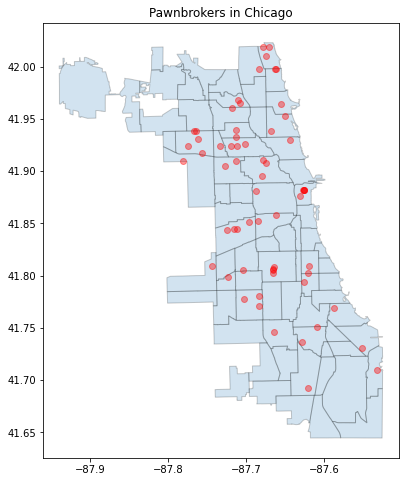

In [53]:
neighborhoods = geopandas.GeoDataFrame.from_file('chicago map.shp')
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(pawns.LONGITUDE, pawns.LATITUDE, color='red', alpha=0.4)
plt.title("Pawnbrokers in Chicago")
plt.show()

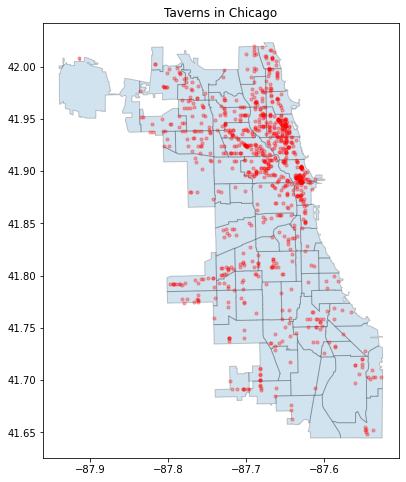

In [54]:
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(taverns.LONGITUDE, taverns.LATITUDE, color='red', alpha=0.3, s=10)
plt.title("Taverns in Chicago")
plt.show()

### Plots of Crimes by Type

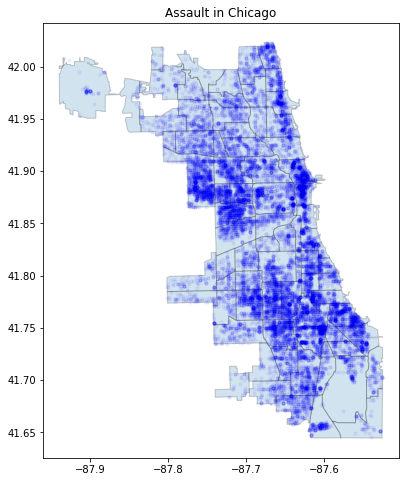

In [55]:
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(assault.Longitude, assault.Latitude, color='b', alpha=0.05, s=10)
plt.title("Assault in Chicago")
plt.show()

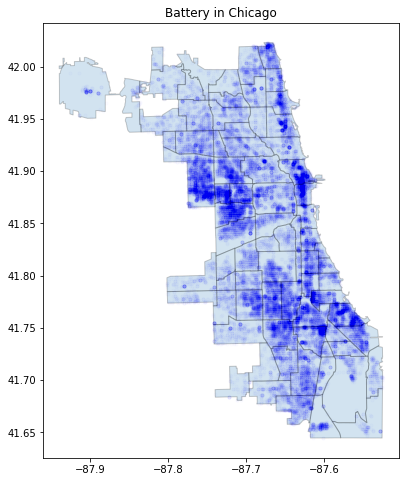

In [56]:
# Note that the transparency of the data markers is set extremely low
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(battery.Longitude, battery.Latitude, color='b', alpha=0.01, s=10)
plt.title("Battery in Chicago")
plt.show()

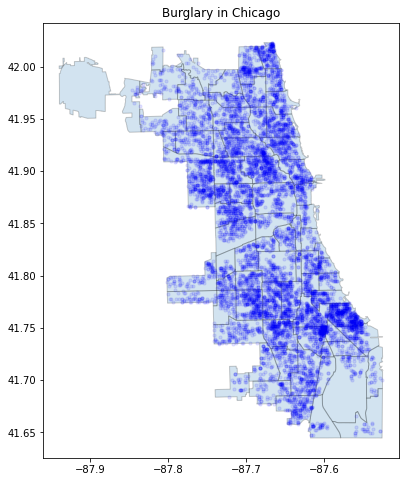

In [57]:
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(burglary.Longitude, burglary.Latitude, color='b', alpha=0.1, s=10)
plt.title("Burglary in Chicago")
plt.show()

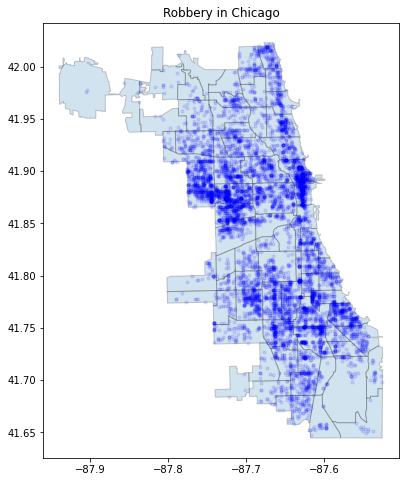

In [58]:
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(robbery.Longitude, robbery.Latitude, color='b', alpha=0.1, s=10)
plt.title("Robbery in Chicago")
plt.show()

### Violent Crime

Violent crime is defined on the following City of Chicago website. It is classified in the crime dataset by the IUCR (Illinois Uniform Crime Reporting) code. In general terms, violent crime consists of homicide, criminal sexual assault, robbery, aggravated assault, and aggravated battery.

<http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html#N01A>

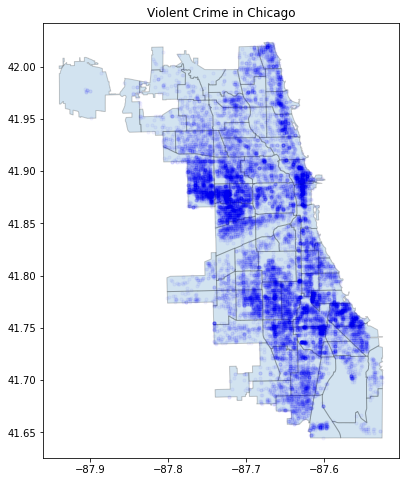

In [59]:
# Create a list of codes for violent crimes
IUCR_vc = ['110', '130', '261', '262', '263', '264', '265', '266', '271', '272', '273', '274', 
           '275', '281', '291', '1753', '1754', '312', '313', '031A', '031B', '320', '325', '326', 
           '330', '331', '334', '337', '033A', '033B', '340', '051A', '051B', '520', '530', '550', 
           '551', '552', '553', '555', '556', '557', '558', '041A', '041B', '420', '430', '450', 
           '451', '452', '453', '461', '462', '479', '480', '481', '482', '483', '485', '488', 
           '489', '490', '491', '492', '493', '495', '496', '497', '498', '510']
violent_crimes = crimes[crimes['IUCR'].isin(IUCR_vc)]

neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(violent_crimes.Longitude, violent_crimes.Latitude, color='b', alpha=0.04, s=10)
plt.title("Violent Crime in Chicago")
plt.show()

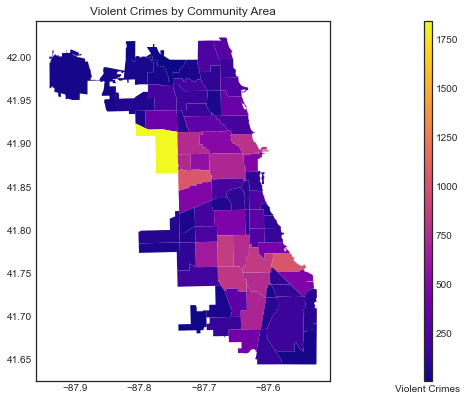

In [60]:
# Add crime column to the geopandas of Chicago community areas

violent_crimes_by_ca = violent_crimes['Community Area'].value_counts()

for comm_area in neighborhoods['area_num_1']:
    neighborhoods.loc[neighborhoods.area_num_1 == comm_area,
                      'violent_crimes'] = violent_crimes_by_ca[int(comm_area)]

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
plt.title("Violent Crimes by Community Area")
#plt.scatter(pawns.LONGITUDE, pawns.LATITUDE, color='red', alpha=1)

cax = divider.append_axes('right', size='2%', pad=0.6)
cax.set_xlabel('Violent Crimes')

neighborhoods.plot(column='violent_crimes', cmap='plasma', legend=True, ax=ax, cax=cax)
plt.show()

### All crime

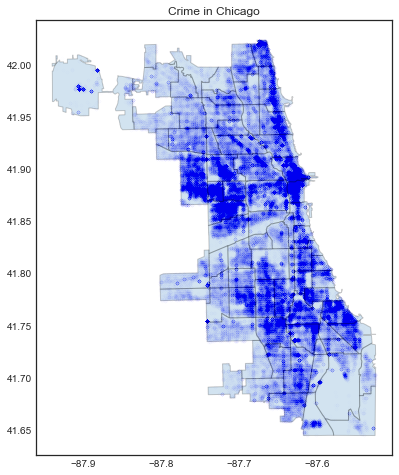

In [61]:
neighborhoods.plot(figsize=(8, 8), alpha=0.2, edgecolor='k')
plt.scatter(crimes.Longitude, crimes.Latitude, color='b', alpha=0.002, s=10)
plt.title("Crime in Chicago")
plt.show()

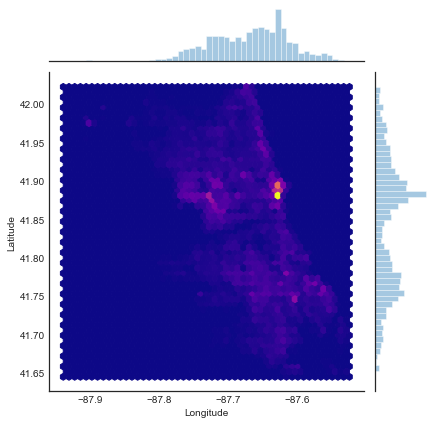

In [62]:
with sns.axes_style("white"):
    sns.jointplot(x=crimes.Longitude, y=crimes.Latitude, kind="hex", cmap="plasma");

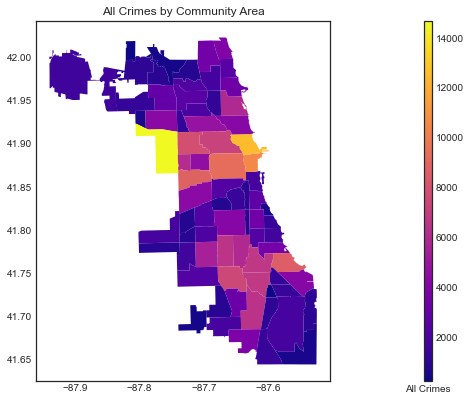

In [63]:
# Add crime column to the geopandas of Chicago neighborhoods

crimes_by_ca = crimes['Community Area'].value_counts()

for comm_area in neighborhoods['area_num_1']:
    neighborhoods.loc[neighborhoods.area_num_1 == comm_area,
                      'all_crimes'] = crimes_by_ca[int(comm_area)]

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
plt.title("All Crimes by Community Area")
#plt.scatter(pawns.LONGITUDE, pawns.LATITUDE, color='red', alpha=1)

cax = divider.append_axes('right', size='2%', pad=0.6)
cax.set_xlabel('All Crimes')

neighborhoods.plot(column='all_crimes', cmap='plasma', legend=True, ax=ax, cax=cax)
plt.show()

## Crimes around Pawnbrokers

Does a pawnshop attract certain types of crime? One could imagine a criminal burglarizing a home or vehicle and selling the stolen goods at a pawnshop. In neighborhoods with pawnshops, do we see clusters of burglaries?

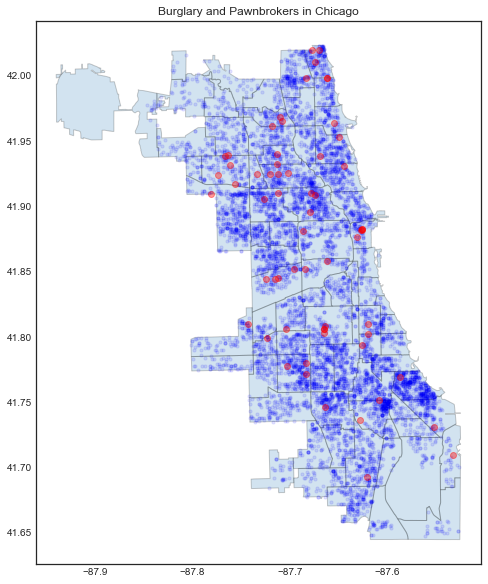

In [64]:
neighborhoods.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
plt.scatter(burglary.Longitude, burglary.Latitude, color='b', alpha=0.1, s=10)

plt.scatter(pawns.LONGITUDE, pawns.LATITUDE, color='red', alpha=0.4)

plt.title("Burglary and Pawnbrokers in Chicago")
plt.show()

It is hard to see a correlation. There are pawnbrokers in areas with low and high burglaries, and there are areas of high burglaries that have no pawnbrokers. Moreover, areas with multiple pawnbrokers do not coincide with the most burglaries.

What about robberies? One could imagine a criminal mugging a person then selling their watch, jewelry, etc. at a pawnshop.

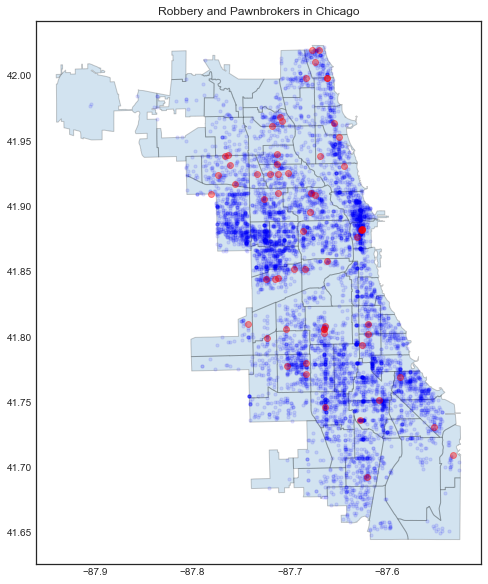

In [65]:
neighborhoods.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
plt.scatter(robbery.Longitude, robbery.Latitude, color='b', alpha=0.1, s=10)
plt.scatter(pawns.LONGITUDE, pawns.LATITUDE, color='red', alpha=0.4)

plt.title("Robbery and Pawnbrokers in Chicago")
plt.show()

There might be a correlation between robbery and pawnbrokers, at least in some neighborhoods. However, there are large concentrations of robbery in the west and south sides without a similarly high number of pawnbrokers. There must be other factors contributing to the incidence of robberies.

## Crimes around Taverns

Does a tavern attract certain types of crime? Hollywood movies are replete with bar fights and stories of two guys who "take it outside" to fight. In the area around a tavern, do we see clusters of assault and battery?

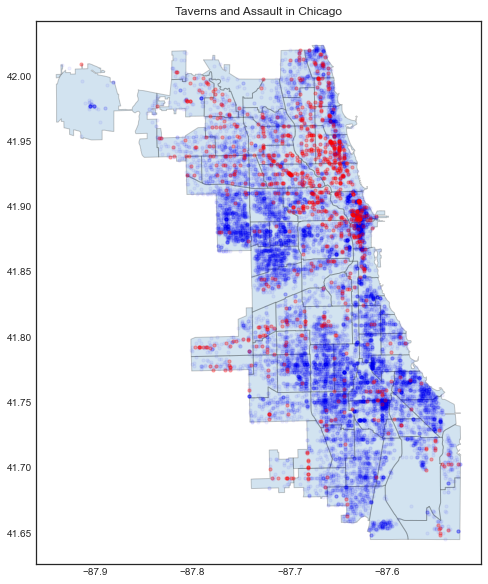

In [66]:
neighborhoods.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
plt.scatter(assault.Longitude, assault.Latitude, color='b', alpha=0.05, s=10)
plt.scatter(taverns.LONGITUDE, taverns.LATITUDE, color='red', alpha=0.3, s=10)

plt.title("Taverns and Assault in Chicago")
plt.show()

The high density of taverns in the north part of the city does not correspond to an equally dense pattern of assault. The large dark blue areas on the west and south sides do not correspond to a similar density of taverns.

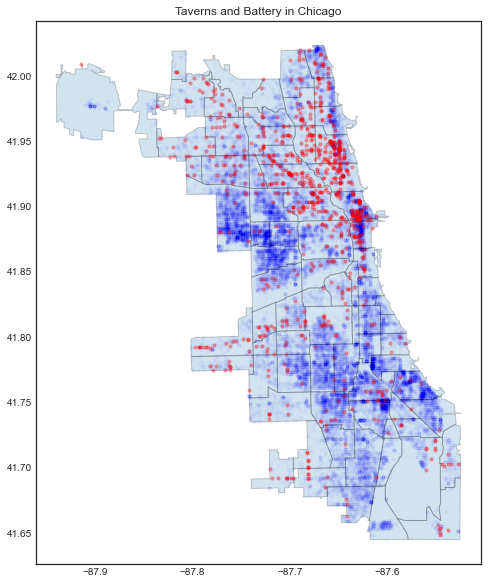

In [67]:
neighborhoods.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
plt.scatter(battery.Longitude, battery.Latitude, color='b', alpha=0.01, s=10)
plt.scatter(taverns.LONGITUDE, taverns.LATITUDE, color='red', alpha=0.3, s=10)

plt.title("Taverns and Battery in Chicago")
plt.show()

The plot does not appear to support a link between taverns and battery. The north side of Chicago has several taverns in areas with low concentrations of battery. The west side has a large dark blue area (high concentration of battery) with very few taverns.

# Socioeconomic data

The Chicago Data Portal has socioeconomic indicators for each community area, last updated September 12, 2014.

Source: https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/data

## Import and inspect data

In [68]:
# Import the population data - by community area
cpop = pd.read_csv('Chicago Population.csv') 
cpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   community   77 non-null     object 
 1   number      77 non-null     float64
 2   population  77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


In [69]:
socio = pd.read_csv(
    "Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")

socio.rename(columns={'Community Area Number': 'area',
                      'COMMUNITY AREA NAME': 'name',
                      'PERCENT OF HOUSING CROWDED': 'crowded_housing',
                      'PERCENT HOUSEHOLDS BELOW POVERTY': 'poverty',
                      'PERCENT AGED 16+ UNEMPLOYED': 'unemployment',
                      'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA': 'no_hs_diploma',
                      'PERCENT AGED UNDER 18 OR OVER 64': 'dependents',
                      'PER CAPITA INCOME ': 'per_capita_income',
                      'HARDSHIP INDEX': 'hardship_index'}, inplace=True)

In [70]:
# Drop the row for the entire city of Chicago
print(socio.shape)
socio.dropna(axis=0, inplace=True)
print(socio.shape)

# Add population column
socio['population'] = cpop['population']

(78, 9)
(77, 9)


In [71]:
socio.head()

,area,name,crowded_housing,poverty,unemployment,no_hs_diploma,dependents,per_capita_income,hardship_index,population
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,53470.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,75185.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,54001.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,46881.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,35406.0


In [72]:
socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               77 non-null     float64
 1   name               77 non-null     object 
 2   crowded_housing    77 non-null     float64
 3   poverty            77 non-null     float64
 4   unemployment       77 non-null     float64
 5   no_hs_diploma      77 non-null     float64
 6   dependents         77 non-null     float64
 7   per_capita_income  77 non-null     int64  
 8   hardship_index     77 non-null     float64
 9   population         77 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.6+ KB


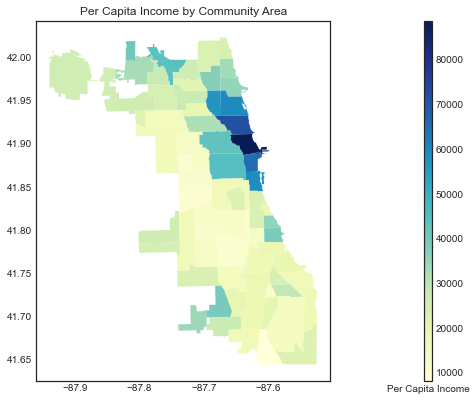

In [73]:
# Add a socioeconomic column to the geopandas of Chicago neighborhoods
# Note the trailing space in 'PER CAPITA INCOME '

neighborhoods = geopandas.GeoDataFrame.from_file('chicago map.shp')

# print(neighborhoods['area_num_1'])
for comm_area in neighborhoods['area_num_1']:
    neighborhoods.loc[neighborhoods.area_num_1 == comm_area,
                      'per_capita_income'] = float(socio.loc[socio.area == float(comm_area), 
                                                             'per_capita_income'])

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
plt.title("Per Capita Income by Community Area")

cax = divider.append_axes('right', size='2%', pad=0.6)
cax.set_xlabel('Per Capita Income')

neighborhoods.plot(column='per_capita_income',
                   cmap='YlGnBu', legend=True, ax=ax, cax=cax)
plt.show()

## Compare to crime

In [74]:
for comm_area in socio.area:
    if not math.isnan(comm_area):
        socio.loc[socio.area == comm_area,
                  'violent_crime'] = violent_crimes_by_ca[int(comm_area)]
        socio.loc[socio.area == comm_area,
                  'all_crime'] = crimes_by_ca[int(comm_area)]
        socio.loc[socio.area == comm_area, 'v_crime_rate'] = violent_crimes_by_ca[int(
            comm_area)] / socio.loc[socio.area == comm_area, 'population'] * 1000
        socio.loc[socio.area == comm_area, 'crime_rate'] = crimes_by_ca[int(
            comm_area)] / socio.loc[socio.area == comm_area, 'population'] * 1000

In [75]:
socio.head()

,area,name,crowded_housing,poverty,unemployment,no_hs_diploma,dependents,per_capita_income,hardship_index,population,violent_crime,all_crime,v_crime_rate,crime_rate
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,53470.0,285.0,4032.0,5.330092,75.406770
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,75185.0,235.0,3439.0,3.125623,45.740507
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,54001.0,262.0,3330.0,4.851762,61.665525
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,46881.0,116.0,1791.0,2.474350,38.203110
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,35406.0,53.0,1264.0,1.496921,35.700164


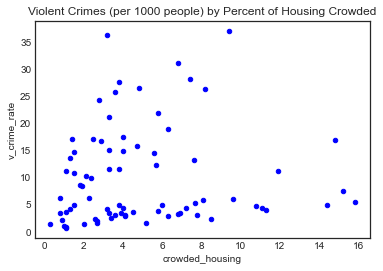

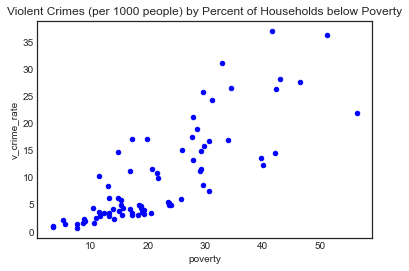

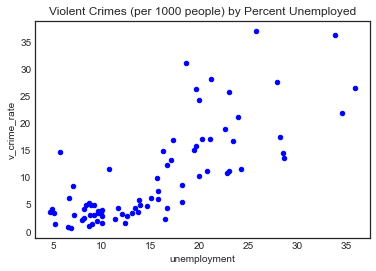

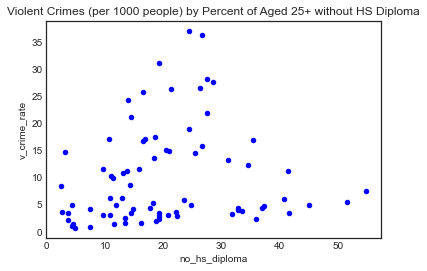

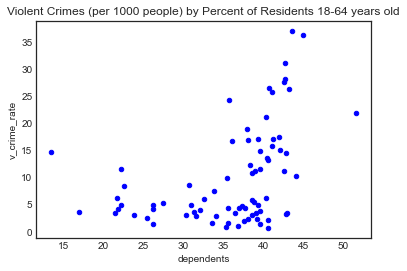

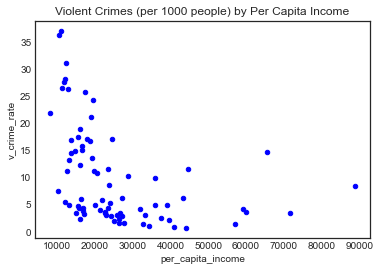

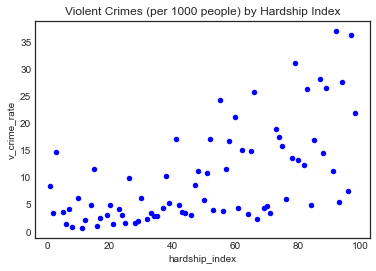

In [76]:
socio.plot.scatter(x='crowded_housing', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Percent of Housing Crowded")

socio.plot.scatter(x='poverty', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Percent of Households below Poverty")

socio.plot.scatter(x='unemployment', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Percent Unemployed")

socio.plot.scatter(x='no_hs_diploma', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Percent of Aged 25+ without HS Diploma")

socio.plot.scatter(x='dependents', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Percent of Residents 18-64 years old")

socio.plot.scatter(x='per_capita_income', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Per Capita Income")

socio.plot.scatter(x='hardship_index', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Hardship Index")

# plot.show();

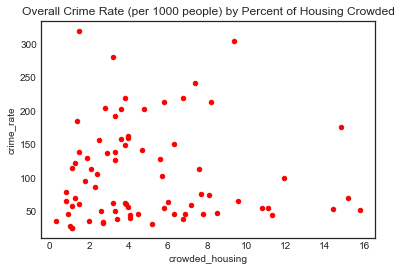

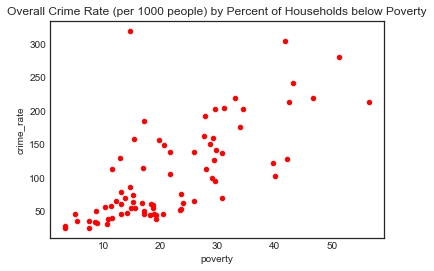

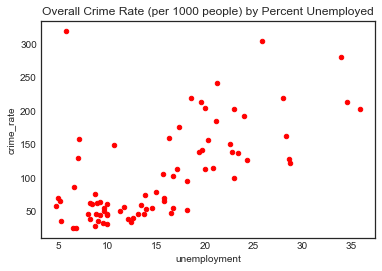

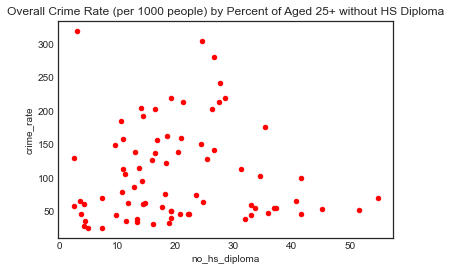

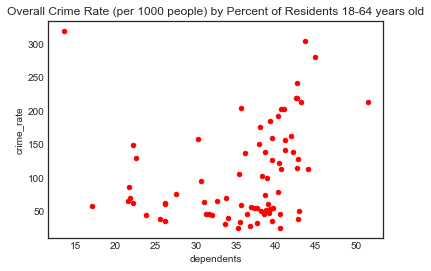

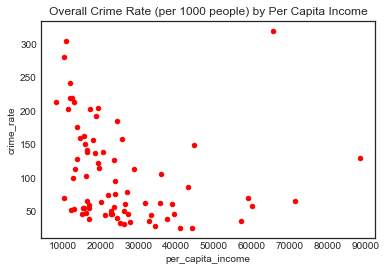

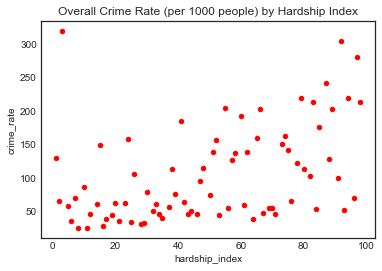

In [77]:
socio.plot.scatter(x='crowded_housing', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Percent of Housing Crowded")

socio.plot.scatter(x='poverty', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Percent of Households below Poverty")

socio.plot.scatter(x='unemployment', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Percent Unemployed")

socio.plot.scatter(x='no_hs_diploma', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Percent of Aged 25+ without HS Diploma")

socio.plot.scatter(x='dependents', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Percent of Residents 18-64 years old")

socio.plot.scatter(x='per_capita_income', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Per Capita Income")

socio.plot.scatter(x='hardship_index', y='crime_rate', c='red',
                   title="Overall Crime Rate (per 1000 people) by Hardship Index")

# plot.show();

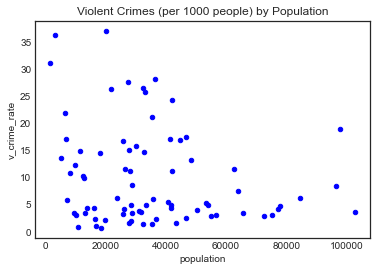

In [78]:
socio.plot.scatter(x='population', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Population")

In [79]:
pops = socio[['name','population', 'v_crime_rate']]
pops.sort_values(by=['population'])


,name,population,v_crime_rate
46,Burnside,1703.0,31.121550
36,Fuller Park,3220.0,36.335404
35,Oakland,5181.0,13.510905
53,Riverdale,6565.0,21.934501
44,Avalon Park,7033.0,17.062420
...,...,...,...
18,Belmont Cragin,78037.0,4.741341
23,West Town,84660.0,6.118592
7,Near North Side,96466.0,8.334543
24,Austin,97604.0,18.892668


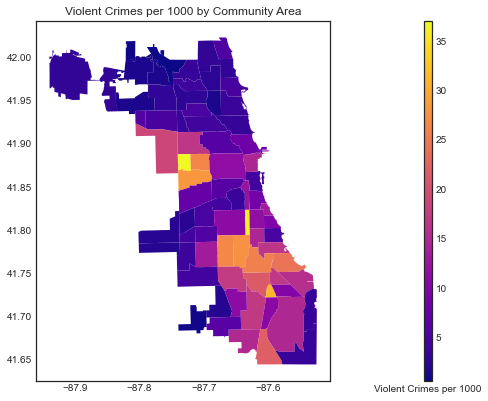

In [80]:
# Add crime column to the geopandas of Chicago community areas

#vc_rate_by_ca = socio['Community Area']

for comm_area in neighborhoods['area_num_1']:
    neighborhoods.loc[neighborhoods.area_num_1 == comm_area,
                      'v_crime_rate'] = socio.v_crime_rate[int(comm_area) - 1]

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
plt.title("Violent Crimes per 1000 by Community Area")
#plt.scatter(pawns.LONGITUDE, pawns.LATITUDE, color='red', alpha=1)

cax = divider.append_axes('right', size='2%', pad=0.6)
cax.set_xlabel('Violent Crimes per 1000')

neighborhoods.plot(column='v_crime_rate', cmap='plasma', legend=True, ax=ax, cax=cax)
plt.show()

# Inferential Statistics

## Correlations - Pawnbrokers

In [140]:
# Create DataFrame of count of businesses and crimes by community area

cas = np.arange(1, 78)
bus_and_crimes = pd.DataFrame(
    index=cas, columns=['area', 'pawnbrokers', 'taverns', 'v_crime', 'all_crime'])
bus_and_crimes['area'] = cas
bus_and_crimes.astype({'area': 'int'})

,area,pawnbrokers,taverns,v_crime,all_crime
1,1,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN
5,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
73,73,NaN,NaN,NaN,NaN
74,74,NaN,NaN,NaN,NaN
75,75,NaN,NaN,NaN,NaN
76,76,NaN,NaN,NaN,NaN


In [141]:
# Total the number of pawnbrokers by community area

for comm_area in bus_and_crimes.area:
    if not math.isnan(comm_area):
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'pawnbrokers'] = len(pawns[pawns.area == str(comm_area)])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'taverns'] = len(taverns[taverns.area == str(comm_area)])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'assault'] = len(assault[assault['Community Area'] == comm_area])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'battery'] = len(battery[battery['Community Area'] == comm_area])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'as_and_batt'] = len(assault[assault['Community Area'] == comm_area]) \
            + len(battery[battery['Community Area'] == comm_area])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'burglary'] = len(burglary[burglary['Community Area'] == comm_area])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'robbery'] = len(robbery[robbery['Community Area'] == comm_area])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'burg_and_rob'] = len(burglary[burglary['Community Area'] == comm_area]) \
            + len(robbery[robbery['Community Area'] == comm_area])
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'v_crime'] = violent_crimes_by_ca[comm_area]
        bus_and_crimes.loc[bus_and_crimes.area == comm_area,
                           'all_crime'] = crimes_by_ca[comm_area]


bus_and_crimes

,area,pawnbrokers,taverns,v_crime,all_crime,assault,battery,as_and_batt,burglary,robbery,burg_and_rob
1,1,5,18,285,4032,276.0,737.0,1013.0,181.0,112.0,293.0
2,2,1,12,235,3439,223.0,588.0,811.0,214.0,90.0,304.0
3,3,1,13,262,3330,274.0,670.0,944.0,109.0,75.0,184.0
4,4,0,19,116,1791,119.0,310.0,429.0,97.0,28.0,125.0
5,5,0,31,53,1264,70.0,117.0,187.0,85.0,24.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...
73,73,0,2,313,3206,281.0,648.0,929.0,133.0,84.0,217.0
74,74,0,8,17,465,27.0,79.0,106.0,27.0,3.0,30.0
75,75,0,6,147,1868,154.0,354.0,508.0,73.0,39.0,112.0
76,76,0,1,31,1619,74.0,222.0,296.0,12.0,8.0,20.0


In [142]:
print(bus_and_crimes.sum())
print(len(assault))
print(len(battery))
print(len(assault) + len(battery))

print(len(burglary))
print(len(robbery))
print(len(burglary) + len(robbery))

area              3003.0
pawnbrokers         62.0
taverns            887.0
v_crime          23941.0
all_crime       258994.0
assault          20601.0
battery          49471.0
as_and_batt      70072.0
burglary          9627.0
robbery           7988.0
burg_and_rob     17615.0
dtype: float64
20601
49471
70072
9627
7988
17615


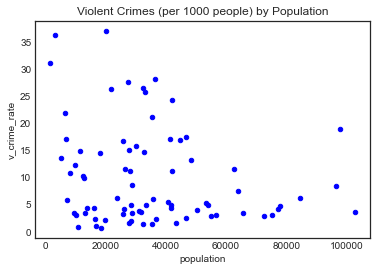

In [82]:
# Scatterplot of pawnbrokers vs. burglary, by community area
socio.plot.scatter(x='population', y='v_crime_rate', c='blue',
                   title="Violent Crimes (per 1000 people) by Population")

# Scatterplot of pawnbrokers vs. robbery

# Scatterplot of pawnbrokers vs. burglaries and robberies

In [83]:
# Correlation of pawnbrokers and burglaries

# Correlation of pawnbrokers and robberies

# Correlation of pawnbrokers and burglaries + robberies

## Correlations - Taverns

In [84]:
# Scatterplot of taverns vs. assault, by community area

# Scatterplot of taverns vs. battery

# Scatterplot of taverns vs. assault and battery

In [85]:
# Correlation of taverns and assault

# Correlation of taverns and battery

# Correlation of taverns and assault + battery

In [149]:
# Drop the area coulmn
bus_crime = bus_and_crimes.drop(columns=['area'])

#correl = bus_crime.corr()
#correl

print(stats.pearsonr(bus_crime['pawnbrokers'], bus_crime['burglary']))
print(stats.pearsonr(bus_crime['pawnbrokers'], bus_crime['robbery']))
print(stats.pearsonr(bus_crime['pawnbrokers'], bus_crime['burg_and_rob']))
print(stats.pearsonr(bus_crime['taverns'], bus_crime['assault']))
print(stats.pearsonr(bus_crime['taverns'], bus_crime['battery']))
print(stats.pearsonr(bus_crime['taverns'], bus_crime['as_and_batt']))


(0.38167420357269255, 0.000614721237919087)
(0.2889636115201943, 0.010809589535241528)
(0.35311541731393825, 0.001632523923378864)
(0.13038946100704174, 0.2583575227941871)
(0.12475515990638861, 0.27967647549624247)
(0.12673454920596763, 0.2720572967065737)


## Socioeconomic factors

In [86]:
# Drop the area coulmn
socio_crime = socio.drop(columns=['area', 'violent_crime', 'all_crime'])
socio_crime

,name,crowded_housing,poverty,unemployment,no_hs_diploma,dependents,per_capita_income,hardship_index,population,v_crime_rate,crime_rate
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,53470.0,5.330092,75.406770
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,75185.0,3.125623,45.740507
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,54001.0,4.851762,61.665525
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,46881.0,2.474350,38.203110
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,35406.0,1.496921,35.700164
...,...,...,...,...,...,...,...,...,...,...,...
72,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,28062.0,11.153874,114.247024
73,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0,16878.0,1.007228,27.550658
74,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,23900.0,6.150628,78.158996
75,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0,10222.0,3.032675,158.383878


In [87]:
correl_all = socio_crime.corr()
correl_all

,crowded_housing,poverty,unemployment,no_hs_diploma,dependents,per_capita_income,hardship_index,population,v_crime_rate,crime_rate
crowded_housing,1.000000,0.319336,0.165160,0.875953,0.224593,-0.541711,0.649574,0.130254,0.077236,-0.016470
poverty,0.319336,1.000000,0.800046,0.424231,0.435537,-0.566851,0.803267,-0.197817,0.812660,0.705296
unemployment,0.165160,0.800046,1.000000,0.355474,0.676112,-0.656469,0.792294,-0.328933,0.775155,0.639734
no_hs_diploma,0.875953,0.424231,0.355474,1.000000,0.408858,-0.709771,0.802538,-0.028432,0.124702,-0.016426
dependents,0.224593,0.435537,0.676112,0.408858,1.000000,-0.754763,0.690844,-0.540419,0.431768,0.246282
per_capita_income,-0.541711,-0.566851,-0.656469,-0.709771,-0.754763,1.000000,-0.849167,0.356771,-0.409364,-0.220852
hardship_index,0.649574,0.803267,0.792294,0.802538,0.690844,-0.849167,1.000000,-0.243996,0.617585,0.443900
population,0.130254,-0.197817,-0.328933,-0.028432,-0.540419,0.356771,-0.243996,1.000000,-0.207087,-0.202126
v_crime_rate,0.077236,0.812660,0.775155,0.124702,0.431768,-0.409364,0.617585,-0.207087,1.000000,0.921888
crime_rate,-0.016470,0.705296,0.639734,-0.016426,0.246282,-0.220852,0.443900,-0.202126,0.921888,1.000000


For all socio-economic indicators, the correlation is stronger with the violent crime rate versus with the overall crime rate. The strongest correlations are with the violent crime rate and the poverty rate (0.813) and unemployment (0.776). 

In [88]:
stats.pearsonr(socio_crime['poverty'], socio_crime['v_crime_rate'])

(0.8126595962792478, 2.888933310618808e-19)

<font color=red>The Pearson correlation of poverty and the violent crime rate is 0.813. The p-value is near zero, meaning that the probability that there is zero correlation is near zero. We can confidently state there is a strong correlation between poverty and the violent crime rate.

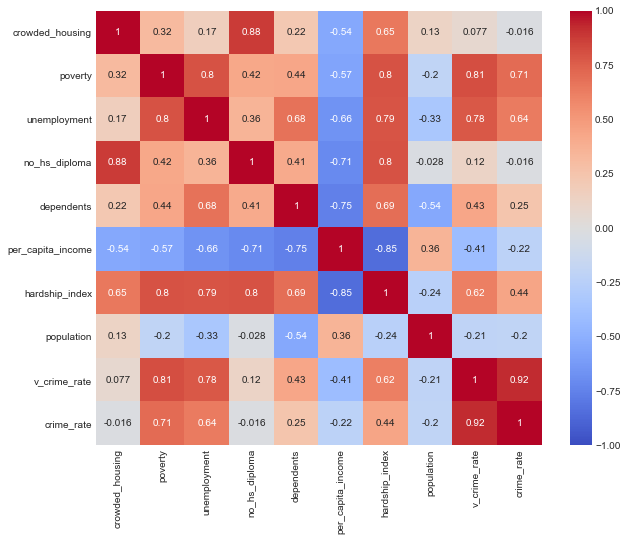

In [89]:
#correl_all[np.abs(correl_all)<.5] = 0
plt.figure(figsize=(10,8))
sns.heatmap(correl_all, vmin=-1, vmax=1, cmap='coolwarm', annot=True);

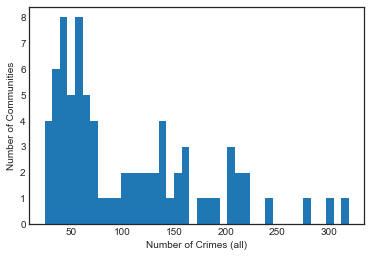

In [90]:
# Make a histogram of the results
_ = plt.hist(socio.crime_rate, bins=40)
_ = plt.xlabel('Number of Crimes (all)')
_ = plt.ylabel('Number of Communities')

# Show the plot
plt.show()


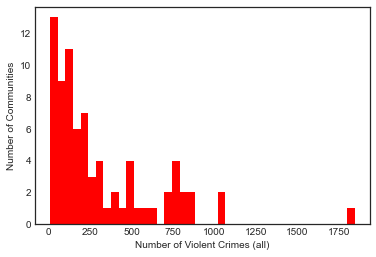

In [91]:
# Make a histogram of the results
_ = plt.hist(socio.violent_crime, bins=40, color='red')
_ = plt.xlabel('Number of Violent Crimes (all)')
_ = plt.ylabel('Number of Communities')

# Show the plot
plt.show()


Clearly, the spread of violent crimes and all crimes in the different communities does not follow a normal distribution. In other words, there are several communities with low crime, and some with very high crime. 

## Population by Zip Code

# Appendix: Extra code that might be useful later

In [92]:
ddf = pd.DataFrame(np.random.random((200,3)))
ddf['date'] = pd.date_range('2000-1-1', periods=200, freq='D')
mask = (ddf['date'] > '2000-6-1') & (ddf['date'] <= '2000-6-10')
print(ddf.loc[mask])

            0         1         2       date
153  0.048931  0.699301  0.934631 2000-06-02
154  0.168941  0.140401  0.841593 2000-06-03
155  0.606985  0.511708  0.938253 2000-06-04
156  0.584500  0.665263  0.479359 2000-06-05
157  0.940719  0.296292  0.759937 2000-06-06
158  0.406884  0.758887  0.671443 2000-06-07
159  0.405199  0.550049  0.756261 2000-06-08
160  0.413374  0.730350  0.415927 2000-06-09
161  0.864479  0.570467  0.739738 2000-06-10


In [93]:
# Extra code that might be useful later
#
#sns.countplot(df["Location Description"])
#sns.countplot(df["Primary Type"])

#print(df.dtypes)
#print(df.loc[df.index == 11734802, 'Latitude'])
#df.loc[null_loc_indexes]

# Create a loop through the Latitude dictionary to see how many of the NaN rows now have valid data



In [94]:
#sns.set(style="darkgrid")

# Set up the figure
#f, ax = plt.subplots(figsize=(10, 10))
#ax.set_aspect("equal")

# Draw the density plot
#ax = sns.kdeplot(crimes.Longitude, crimes.Latitude, cmap="Reds", shade=True, shade_lowest=False)